In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
!pip install scipy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import axes3d

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df=pd.read_csv("fifa_20.csv")
df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In this week's exercise we explore the clustering method k-Means. First, the simplicity of implementing k-Means is shown, then different initialization techniques are compared.

## 1 The k-Means algorithm

Implement the two parts of the algorithm: cluster assignment and mean calculation.

**\_update\_clusters**
- As parameters, the function gets a DataFrame ($n \times d$) containing the dataset ($n$ samples with $d$ dimensions), and a DataFrame ($k \times d$) containing the $k$ mean vectors
- It returns an array of length $n$, containing a cluster label for each sample (row) of the data set 

**\_update\_means**
- This function gets the DataFrame ($n \times d$) containing the dataset as well as an array of length $n$ containing the cluster label of each sample as parameters
- It returns a DataFrame of size $k \times d$ with the $k$ updated mean vectors 

<br>
Some Hints:
<ul>
<li><a href=https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.spatial.distance.cdist.html>scipy.spatial.distance.cdist</a></li>
<li><a href=https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.argmin.html>numpy.argmin</a></li>
<li><a href=https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html>pandas.DataFrame.groupby</a></li>
</ul>

Feel free to add import statements! 

In [5]:
# Implement _update_clusters and _update_means

def myKMeans(data, k, iterations):
    means = _init_means(data, k)
    clusters = _update_clusters(data, means)

    for i in range(iterations):
        #print("iteration number: ",i)
        means = _update_means(data, clusters)
        clusters = _update_clusters(data, means)
        #print("means: ",means)
        #print("clusters: ",type(clusters))
    #print('clusters',clusters)
    return clusters


def _init_means(data, k):
    min_values = data.min()
    max_values = data.max()
    means = np.random.uniform(min_values, max_values, (k, data.shape[1]))
    #print("means: ",means)
    return means


def _update_clusters(data, means):
    # Implement _update_clusters
    #finding the distance between data and mean
    dist = cdist(data, means, metric='euclidean')
    
    #finding the appropriate cluster for each row(or example)
    cluster = np.argmin(dist, axis=1)
    
    return cluster


def _update_means(data, clusters):
    #stacking up
    data2=np.column_stack((data,clusters))

    #converting the above n-d array to a dataframe
    df=pd.DataFrame(data2,columns=['mental','shots','cluster'])
    
    #calculating the average over the k-clusters
    avg = df.groupby(['cluster']).mean()
    
    return avg

Test your implementation by clustering the features ``mentality_interceptions`` and ``power_long_shots``. <br>
Try different values for $k$ and visualize the results. Which $k$ seems to produce the best result?  
Also calculate the [Silhouette Coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). Does it confirm your intuition?

silhouette_score:  0.44475581342512066


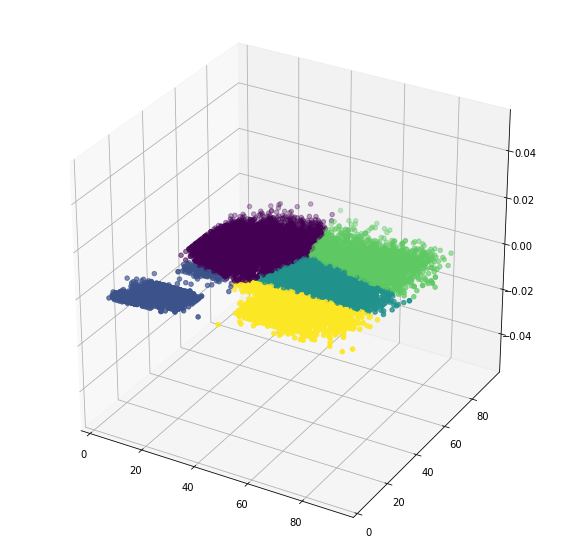

In [6]:
# Use your k-Means implementation and visualize the results. Print the silhouette score.
data = df[['mentality_interceptions','power_long_shots']]
a = myKMeans(data, k=5, iterations=30)
print("silhouette_score: ",silhouette_score(data,a))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['mentality_interceptions'],data['power_long_shots'],c=list(a))
plt.show()

## 2 Different initializations of k-Means

Take a look at the influence of different initializations of the k-Means algorithm. For this purpose, compare random initialization with the [*k-means++* initialization algorithm](https://en.wikipedia.org/wiki/K-means%2B%2B). Use the [sklearn implementation of k-Means](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) and run the algorithm with: 
- `1, 2, 3, 4, 5, 10, 20` as the maximum number of iterations (`max_iter`)
- `10` initializations each (`n_init`)
- and a convergence tolerance of `0` (`tol`).

For both initialization methods, plot the final value of the objective function (`inertia_`) against the number of iterations in line plots of different colors.

What do you observe?

In [ ]:
# Use the sklearn implementation of k-Means and plot the objective function for both initialization methods.

iterations = [1, 2, 3, 4, 5, 10, 20]

objective = pd.Series(data = 0, index=iterations)
objective_pp = pd.Series(data = 0, index=iterations)
for i in iterations:
    # Add code here


    
plt.plot(objective.index, objective, 'b-')
plt.plot(objective_pp.index, objective_pp, 'r-')
plt.title('objective functions for different initializations')
plt.xlabel('iterations')
plt.ylabel('objective')
plt.show()